In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F68479%2F7609535%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240323%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240323T112442Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db03c4765e91abdcd724b1f5b5fed9253bcb092f8fcc40a6da96dc510a8f5272c709b050ac1c3f005bfe522822220819b4cfce30a73f968a1992ab608dfa056bdf73ab6445ddb1bbe42613b004248eef885c92db461c092d9bbc5c12b55232d3fc2e7eb5aef84f3d3781c2f3845395e1125d3a80f22e33af168033552d6453f9546485c0bad6efc85bafb843ff99b52b99c644af1c9bf73f9b88dda07618d297d11a245be19fa4ee30a8c55946b31630c2c68ef9ff719dd8dd633408216b18c142c77e4c02762e3be06cb6c1332d034acbc50a2c7bf5059c62200a7a12c3c6e0e02ed1c854c2488f0fa9c30f3bf680d86187927e5ae2b6709af0b4e449a23f47d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np

Loading dataset

In [ ]:
df=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
df.head(30)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
encoded_columns = pd.get_dummies(df[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']],dtype=float)
df.drop(['id','Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'], axis=1, inplace=True)
df = pd.concat([df, encoded_columns], axis=1)

In [ ]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Checking for data Cleaning but data is clean

In [ ]:
df.isnull().sum()

Age                                   0
Height                                0
Weight                                0
FCVC                                  0
NCP                                   0
CH2O                                  0
FAF                                   0
TUE                                   0
NObeyesdad                            0
Gender_Female                         0
Gender_Male                           0
family_history_with_overweight_no     0
family_history_with_overweight_yes    0
FAVC_no                               0
FAVC_yes                              0
CAEC_Always                           0
CAEC_Frequently                       0
CAEC_Sometimes                        0
CAEC_no                               0
SMOKE_no                              0
SMOKE_yes                             0
SCC_no                                0
SCC_yes                               0
CALC_Frequently                       0
CALC_Sometimes                        0


In [ ]:
df.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
NObeyesdad                             object
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                            

Types of Obesity in dataset

In [ ]:
unique_names = df['NObeyesdad'].unique()
print(unique_names)

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


Selecting trainable features and target Output

In [ ]:
y_train=df['NObeyesdad']
X_train=df.drop(columns=['NObeyesdad'])

In [ ]:
X_train.shape,y_train.shape

((20758, 30), (20758,))

In [ ]:
X_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y_train.nunique()

7

Normalizing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Normalize float values in all columns
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [ ]:
X_train.head(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.222192,0.475586,0.338497,0.500000,0.661099,0.881787,0.000000,0.488237,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.085106,0.209260,0.142792,0.500000,0.666667,0.500000,0.333333,0.500000,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.085106,0.497391,0.088577,0.440267,0.137228,0.455189,0.288682,0.836792,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.147931,0.496002,0.732007,1.000000,0.666667,0.337031,0.489288,0.390099,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.375342,0.883049,0.434708,0.839832,0.323824,0.489924,0.655991,0.465861,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming Y_train is a pandas Series containing categorical values
one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()

# Now, Y_train_encoded contains the one-hot encoded labels


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.shape,y_train.shape

((20758, 30), (20758, 7))

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


* 0 layer = accuracy = 86% = No Underfitting and Overfitting   ep=30  underfitting
* 1 layer = accuracy = 87% = bit Underfitting 128
* 2 layer = accuracy = 86% = bit Underfitting 128 128

df.drop(['id'],axis=1,inplace=True)

Submission Model 2 = 0 layer LeaakyRelu  accuracy is 87.5 % epoch = 50
submission Model 3 = 4layer Dense(31, activation='LeakyReLU', input_shape=(X_train.shape[1],)),
    Dense(128, activation='LeakyReLU'),
    Dense(64, activation='LeakyReLU'),
    Dropout(0.1),
    Dense(y_train.shape[1], activation='softmax')  accuracy = 86 % final score very less 0.0 epoch=50


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, LeakyReLU

# Define the model
model = Sequential([
   Dense(30, activation='ReLU', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='ReLU'),
    Dropout(0.2),
    Dense(128, activation='ReLU'),
    Dropout(0.2),
    Dense(64, activation='ReLU'),
    Dropout(0.2),
    Dense(30, activation='ReLU'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
416/416 [==============================] - 3s 4ms/step - loss: 0.4804 - accuracy: 0.8354 - val_loss: 0.3849 - val_accuracy: 0.8736
Epoch 2/25
416/416 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.8373 - val_loss: 0.3982 - val_accuracy: 0.8685
Epoch 3/25
416/416 [==============================] - 1s 3ms/step - loss: 0.4650 - accuracy: 0.8368 - val_loss: 0.4680 - val_accuracy: 0.8347
Epoch 4/25
416/416 [==============================] - 2s 4ms/step - loss: 0.4644 - accuracy: 0.8389 - val_loss: 0.3842 - val_accuracy: 0.8721
Epoch 5/25
416/416 [==============================] - 1s 3ms/step - loss: 0.4616 - accuracy: 0.8405 - val_loss: 0.4084 - val_accuracy: 0.8546
Epoch 6/25
416/416 [==============================] - 1s 3ms/step - loss: 0.4584 - accuracy: 0.8397 - val_loss: 0.4002 - val_accuracy: 0.8615
Epoch 7/25
416/416 [==============================] - 2s 4ms/step - loss: 0.4529 - accuracy: 0.8436 - val_loss: 0.3850 - val_accuracy: 0.8679
Epoch 

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

130/130 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.8145
Test Loss: 0.5113586187362671
Test Accuracy: 0.8145471811294556


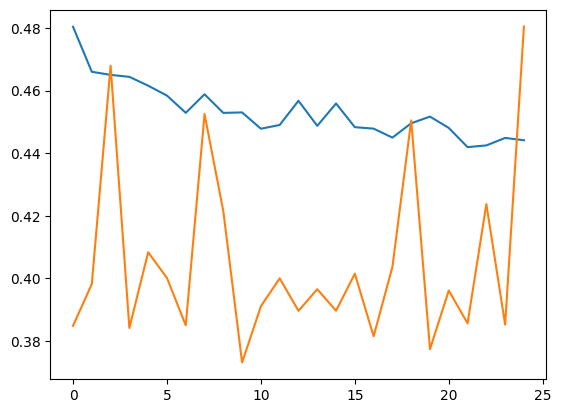

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
df_new=pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
df_new.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
Id=df_new['id']

In [ ]:
encoded_columns1 = pd.get_dummies(df_new[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']],dtype=float)
df_new.drop(['id','Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'], axis=1, inplace=True)
df_new= pd.concat([df_new, encoded_columns1], axis=1)

In [ ]:
df_new.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_new.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

In [ ]:
df_new=df_new[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE','Gender_Female','Gender_Male','family_history_with_overweight_no',
'family_history_with_overweight_yes','FAVC_no','FAVC_yes','CAEC_Always','CAEC_Frequently','CAEC_Sometimes','CAEC_no',
'SMOKE_no','SMOKE_yes','SCC_no','SCC_yes','CALC_Frequently','CALC_Sometimes','CALC_no','MTRANS_Automobile',
'MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']]

In [ ]:
unique_names[0]

'Overweight_Level_II'

In [ ]:
predictions = model.predict(df_new)

433/433 [==============================] - 1s 1ms/step


In [ ]:
predicted_classes_index = np.argmax(predictions, axis=1)

In [ ]:
predictions = model.predict(df_new)
print(predictions.shape)
print(predictions)
predicted_classes = [unique_names[i] for i in predicted_classes_index]

# Save predictions and corresponding class names to a CSV file
predictions_df = pd.DataFrame({'id': Id, 'Predicted_Class': predicted_classes})
predictions_df.to_csv('predictions1.7.csv', index=False)


433/433 [==============================] - 1s 1ms/step
(13840, 7)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
